#Importing Libraries*

* sklearn libraries are used to train and test machine learning models [1].


In [3]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn import preprocessing
from sklearn import metrics 
import re
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#Reading the Data set

In [4]:
df = pd.read_csv('Combined_D3.csv') #change the file name to use different data sets
df.sample(5)

,num_memories,num_mult,num_pre_packed_blocks,critical_path_delay,Ratio Percentage
49,0,11,31628,17.96240,1.0
88,0,9,2783,5.02081,0.9
42,2,1,4310,14.42380,1.0
34,0,11,31683,18.53870,1.0
27,2,1,4310,14.01300,1.0


#Pre-processing the data

##Data Encoding

In [5]:
encoding_lable = preprocessing.LabelEncoder()
df['Ratio Class']= encoding_lable.fit_transform(df['Ratio Percentage'])
df = df.drop(columns='Ratio Percentage')
df.sample(5)

,num_memories,num_mult,num_pre_packed_blocks,critical_path_delay,Ratio Class
33,0,11,31683,19.14370,8
82,0,5,923,22.23730,8
5,0,0,360,6.89894,0
95,0,9,2783,4.85355,6
67,2,1,4338,14.61620,8


In [6]:
df = df.dropna()
data = df.to_numpy()

##Splitting the data set into train and test sets

In [7]:
X = data[:,0:4]
y = data[:,4:]
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2, random_state=42
)

##Normalizing the data

In [8]:
#Scaling the data
std_scaler = StandardScaler()
X_train_scaled = std_scaler.fit_transform(X_train)
X_test_scaled = std_scaler.transform(X_test)
#Printing shape of train and test vectors
print("X_train: Shape: ",X_train_scaled.shape)
print("Y_train: Shape: ",y_train.shape)
print("X_test:  Shape: ",X_test_scaled.shape)
print("Y_test:  Shape: ",y_test.shape)

X_train: Shape:  (80, 4)
Y_train: Shape:  (80, 1)
X_test:  Shape:  (20, 4)
Y_test:  Shape:  (20, 1)


#Machine Learning Models

##Logistic Regression

###Fitting the data

In [9]:
logreg = LogisticRegression()
logreg.fit(X_train_scaled, y_train.ravel())
Y_pred_log = logreg.predict(X_test_scaled)
acc_log = accuracy_score(y_test, Y_pred_log) * 100
print("Test output: \n",y_test.ravel())
print("Predicted output: \n",Y_pred_log)


Test output: 
 [8. 8. 1. 8. 8. 0. 4. 8. 0. 4. 0. 8. 1. 8. 6. 3. 1. 1. 0. 8.]
Predicted output: 
 [8. 8. 1. 8. 8. 1. 8. 8. 1. 8. 1. 8. 1. 8. 5. 4. 1. 1. 1. 8.]


In [10]:
#Calculating the train accuracy
logreg = LogisticRegression()
logreg.fit(X_train_scaled, y_train.ravel())
Y_pred_logT = logreg.predict(X_train_scaled)
acc_logT = accuracy_score(y_train, Y_pred_logT) * 100

###Evaluation Results

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


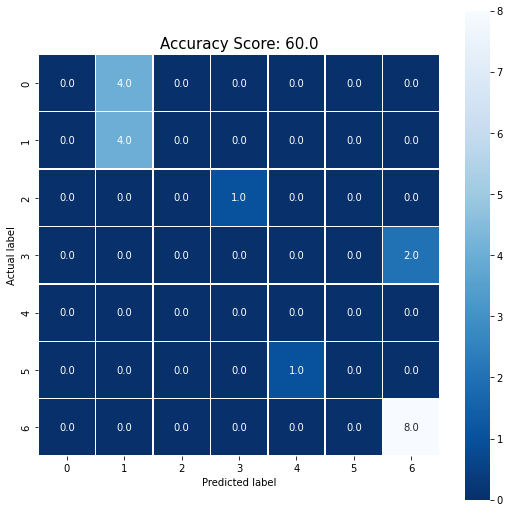

In [11]:
cnf_mt = metrics.confusion_matrix(y_test, Y_pred_log)
plt.figure(figsize=(9,9))
sns.heatmap(cnf_mt, annot=True, fmt=".1f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(acc_log)
plt.title(all_sample_title, size = 15);
precision_log = metrics.precision_score(y_test, Y_pred_log, average='macro')*100
recall_log = metrics.recall_score(y_test, Y_pred_log, average='macro')*100
plt.savefig('cm1_log.png')

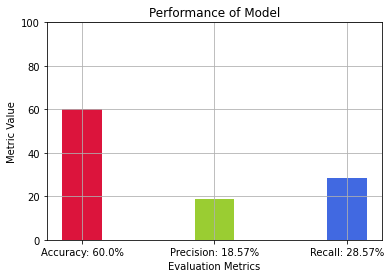

In [12]:
metric = [acc_log, precision_log, recall_log]
lables=['Accuracy: '+str(round(acc_log,2))+'%', 'Precision: '+str(round(precision_log,2))+'%', 'Recall: '+str(round(recall_log,2))+'%']
xpos = np.arange(len(lables))
plt.bar(xpos, metric,width = .3, color=['crimson', 'yellowgreen', 'royalblue'])
plt.xticks(xpos, lables)
x1,x2,y1,y2 = plt.axis()  
plt.axis((x1,x2,y1,100))
plt.grid()
plt.xlabel('Evaluation Metrics')
plt.ylabel('Metric Value')
plt.title("Performance of Model")
plt.savefig('g1_log.png')
plt.show()

##Random Forest

###Fitting the data

In [13]:
random_forest = RandomForestClassifier(n_estimators=50)
random_forest.fit(X_train_scaled,y_train.ravel())
Y_pred_rf= random_forest.predict(X_test_scaled)
acc_rf = accuracy_score(y_test, Y_pred_rf) * 100
print("Test output: \n",y_test.ravel())
print("Predicted output: \n",Y_pred_rf)

Test output: 
 [8. 8. 1. 8. 8. 0. 4. 8. 0. 4. 0. 8. 1. 8. 6. 3. 1. 1. 0. 8.]
Predicted output: 
 [4. 8. 1. 8. 8. 0. 4. 8. 2. 4. 0. 8. 1. 8. 6. 4. 1. 1. 2. 8.]


In [14]:
#Calculating the train accuracy
random_forest = RandomForestClassifier(n_estimators=50)
random_forest.fit(X_train_scaled,y_train.ravel())
Y_pred_rfT= random_forest.predict(X_train_scaled)
acc_rfT = accuracy_score(y_train, Y_pred_rfT) * 100

###Evaluation Results

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


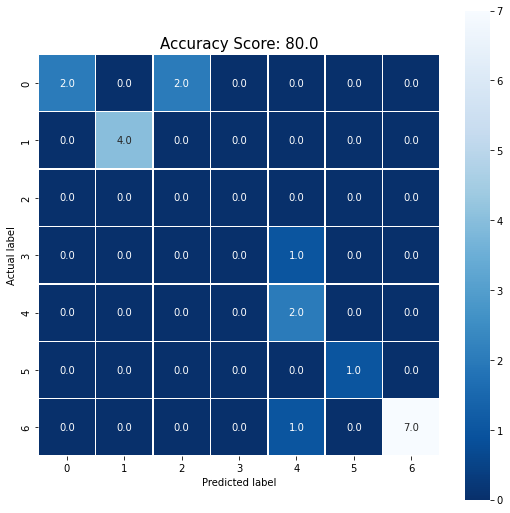

In [15]:
cnf_mt = metrics.confusion_matrix(y_test, Y_pred_rf)
plt.figure(figsize=(9,9))
sns.heatmap(cnf_mt, annot=True, fmt=".1f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(acc_rf)
plt.title(all_sample_title, size = 15);
precision_rf = metrics.precision_score(y_test, Y_pred_rf, average='macro')*100
recall_rf = metrics.recall_score(y_test, Y_pred_rf, average='macro')*100
plt.savefig('cm1_rf.png')

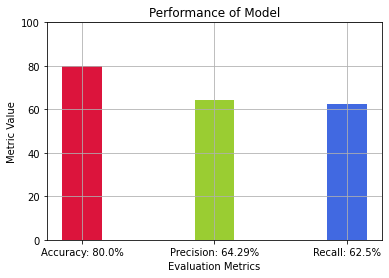

In [16]:
metric = [acc_rf, precision_rf, recall_rf]
lables=['Accuracy: '+str(round(acc_rf,2))+'%', 'Precision: '+str(round(precision_rf,2))+'%', 'Recall: '+str(round(recall_rf,2))+'%']
xpos = np.arange(len(lables))
plt.bar(xpos, metric,width = .3, color=['crimson', 'yellowgreen', 'royalblue'])
plt.xticks(xpos, lables)
x1,x2,y1,y2 = plt.axis()  
plt.axis((x1,x2,y1,100))
plt.grid()
plt.xlabel('Evaluation Metrics')
plt.ylabel('Metric Value')
plt.title("Performance of Model")
plt.savefig('g1_rf.png')
plt.show()

##Decision Tree

###Fitting the data

In [17]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train_scaled, y_train)
Y_pred_dt = decision_tree.predict(X_test_scaled)
acc_dt = accuracy_score(y_test, Y_pred_dt) * 100
print("Test output: \n",y_test.ravel())
print("Predicted output: \n",Y_pred_dt)

Test output: 
 [8. 8. 1. 8. 8. 0. 4. 8. 0. 4. 0. 8. 1. 8. 6. 3. 1. 1. 0. 8.]
Predicted output: 
 [4. 8. 1. 8. 8. 0. 4. 8. 2. 4. 0. 8. 1. 8. 6. 4. 1. 1. 2. 8.]


In [18]:
#Calculating the train accuracy
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train_scaled, y_train)
Y_pred_dtT = decision_tree.predict(X_train_scaled)
acc_dtT = accuracy_score(y_train, Y_pred_dtT) * 100

###Evaluation Results

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


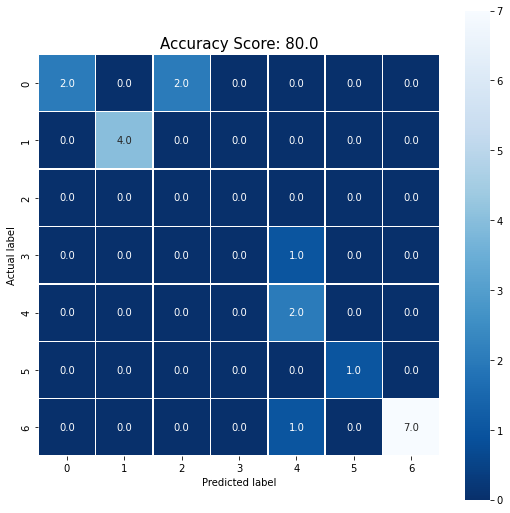

In [19]:
cnf_mt = metrics.confusion_matrix(y_test, Y_pred_dt)
plt.figure(figsize=(9,9))
sns.heatmap(cnf_mt, annot=True, fmt=".1f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(acc_dt)
plt.title(all_sample_title, size = 15);
precision_dt = metrics.precision_score(y_test, Y_pred_dt, average='macro')*100
recall_dt = metrics.recall_score(y_test, Y_pred_dt, average='macro')*100
plt.savefig('cm1_dt.png')

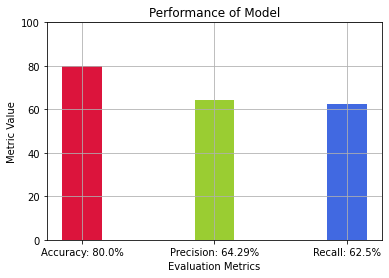

In [20]:
metric = [acc_dt, precision_dt, recall_dt]
lables=['Accuracy: '+str(round(acc_dt,2))+'%', 'Precision: '+str(round(precision_dt,2))+'%', 'Recall: '+str(round(recall_dt,2))+'%']
xpos = np.arange(len(lables))
plt.bar(xpos, metric,width = .3, color=['crimson', 'yellowgreen', 'royalblue'])
plt.xticks(xpos, lables)
x1,x2,y1,y2 = plt.axis()  
plt.axis((x1,x2,y1,100))
plt.grid()
plt.xlabel('Evaluation Metrics')
plt.ylabel('Metric Value')
plt.title("Performance of Model")
plt.savefig('g1_dt.png')
plt.show()

##K-Nearest Neighbors

###Fitting the data

In [21]:
knn = KNeighborsClassifier(n_neighbors = 10)
knn.fit(X_train_scaled, y_train.ravel())
Y_pred_knn = knn.predict(X_test_scaled)
acc_knn = accuracy_score(y_test, Y_pred_knn) * 100
print("Test output: \n",y_test.ravel())
print("Predicted output: \n",Y_pred_knn)

Test output: 
 [8. 8. 1. 8. 8. 0. 4. 8. 0. 4. 0. 8. 1. 8. 6. 3. 1. 1. 0. 8.]
Predicted output: 
 [4. 8. 1. 8. 8. 1. 4. 8. 0. 4. 1. 8. 1. 8. 5. 4. 1. 1. 0. 8.]


In [22]:
#Calculating the train accuracy
knn = KNeighborsClassifier(n_neighbors = 10)
knn.fit(X_train_scaled, y_train.ravel())
Y_pred_knnT = knn.predict(X_train_scaled)
acc_knnT = accuracy_score(y_train, Y_pred_knnT) * 100

###Evaluation Results

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


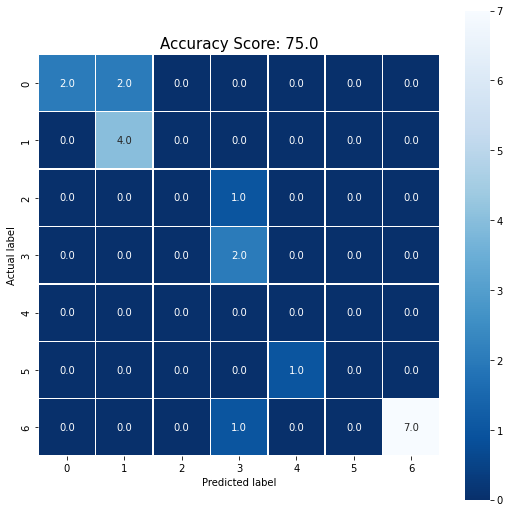

In [23]:
cnf_mt = metrics.confusion_matrix(y_test, Y_pred_knn)
plt.figure(figsize=(9,9))
sns.heatmap(cnf_mt, annot=True, fmt=".1f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(acc_knn)
plt.title(all_sample_title, size = 15);
precision_knn = metrics.precision_score(y_test, Y_pred_knn, average='macro')*100
recall_knn = metrics.recall_score(y_test, Y_pred_knn, average='macro')*100
plt.savefig('cm1_knn.png')

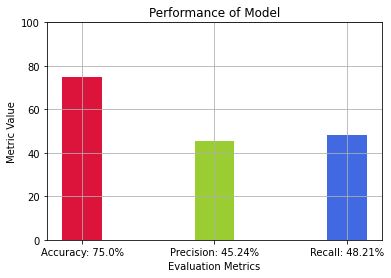

In [24]:
metric = [acc_knn, precision_knn, recall_knn]
lables=['Accuracy: '+str(round(acc_knn,2))+'%', 'Precision: '+str(round(precision_knn,2))+'%', 'Recall: '+str(round(recall_knn,2))+'%']
xpos = np.arange(len(lables))
plt.bar(xpos, metric,width = .3, color=['crimson', 'yellowgreen', 'royalblue'])
plt.xticks(xpos, lables)
x1,x2,y1,y2 = plt.axis()  
plt.axis((x1,x2,y1,100))
plt.grid()
plt.xlabel('Evaluation Metrics')
plt.ylabel('Metric Value')
plt.title("Performance of Model")
plt.savefig('g1_knn.png')
plt.show()

##MLP

###Fitting the data

In [25]:
clf_mlp = MLPClassifier(random_state=1, max_iter=300).fit(X_train_scaled, y_train.ravel())
Y_pred_mlp= clf_mlp.predict(X_test_scaled)
acc_mlp = accuracy_score(y_test, Y_pred_mlp) * 100
print("Test output: \n",y_test.ravel())
print("Predicted output: \n",Y_pred_mlp)

Test output: 
 [8. 8. 1. 8. 8. 0. 4. 8. 0. 4. 0. 8. 1. 8. 6. 3. 1. 1. 0. 8.]
Predicted output: 
 [4. 8. 1. 4. 8. 1. 4. 8. 1. 4. 1. 8. 1. 8. 5. 8. 1. 1. 1. 8.]


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


In [26]:
#Calculating the train accuracy
clf_mlp = MLPClassifier(random_state=1, max_iter=300).fit(X_train_scaled, y_train.ravel())
Y_pred_mlpT= clf_mlp.predict(X_train_scaled)
acc_mlpT = accuracy_score(y_train, Y_pred_mlpT) * 100

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


###Evaluation Results

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


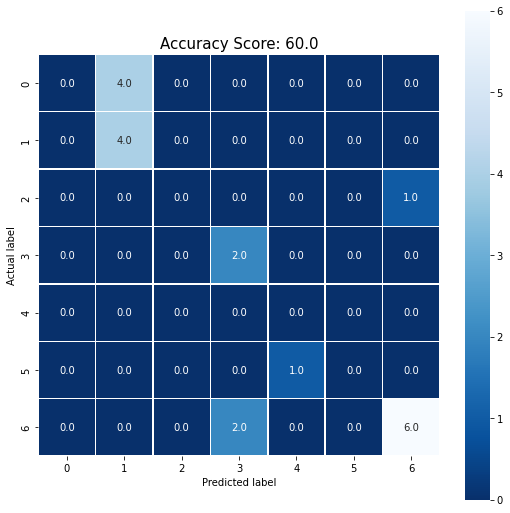

In [27]:
cnf_mt = metrics.confusion_matrix(y_test, Y_pred_mlp)
plt.figure(figsize=(9,9))
sns.heatmap(cnf_mt, annot=True, fmt=".1f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(acc_mlp)
plt.title(all_sample_title, size = 15);
precision_mlp = metrics.precision_score(y_test, Y_pred_mlp, average='macro')*100
recall_mlp = metrics.recall_score(y_test, Y_pred_mlp, average='macro')*100
plt.savefig('cm1_mlp.png')

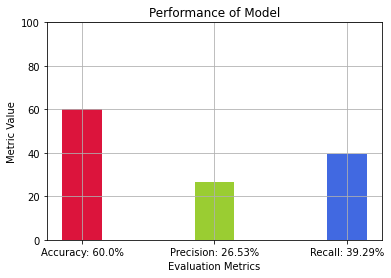

In [28]:
metric = [acc_mlp, precision_mlp, recall_mlp]
lables=['Accuracy: '+str(round(acc_mlp,2))+'%', 'Precision: '+str(round(precision_mlp,2))+'%', 'Recall: '+str(round(recall_mlp,2))+'%']
xpos = np.arange(len(lables))
plt.bar(xpos, metric,width = .3, color=['crimson', 'yellowgreen', 'royalblue'])
plt.xticks(xpos, lables)
x1,x2,y1,y2 = plt.axis()  
plt.axis((x1,x2,y1,100))
plt.grid()
plt.xlabel('Evaluation Metrics')
plt.ylabel('Metric Value')
plt.title("Performance of Model")
plt.savefig('g1_mlp.png')
plt.show()

##AdaBoost

###Fitting the data

In [29]:
clf_adab = AdaBoostClassifier(n_estimators=100, random_state=0)
clf_adab.fit(X_train_scaled, y_train.ravel())
Y_pred_adab= clf_adab.predict(X_test_scaled)
acc_adab = accuracy_score(y_test, Y_pred_adab) * 100
print("Test output: \n",y_test.ravel())
print("Predicted output: \n",Y_pred_adab)

Test output: 
 [8. 8. 1. 8. 8. 0. 4. 8. 0. 4. 0. 8. 1. 8. 6. 3. 1. 1. 0. 8.]
Predicted output: 
 [8. 8. 1. 8. 8. 1. 8. 8. 1. 8. 1. 8. 1. 8. 5. 8. 1. 1. 1. 8.]


In [30]:
#Calculating the train accuracy
clf_adab = AdaBoostClassifier(n_estimators=100, random_state=0)
clf_adab.fit(X_train_scaled, y_train.ravel())
Y_pred_adabT= clf_adab.predict(X_train_scaled)
acc_adabT = accuracy_score(y_train, Y_pred_adabT) * 100

###Evaluation Results

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


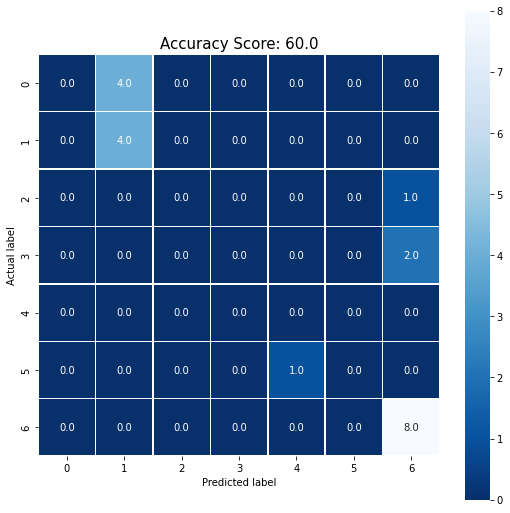

In [31]:
cnf_mt = metrics.confusion_matrix(y_test, Y_pred_adab)
plt.figure(figsize=(9,9))
sns.heatmap(cnf_mt, annot=True, fmt=".1f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(acc_adab)
plt.title(all_sample_title, size = 15);
precision_adab = metrics.precision_score(y_test, Y_pred_adab, average='macro')*100
recall_adab = metrics.recall_score(y_test, Y_pred_adab, average='macro')*100
plt.savefig('cm1_adab.png')

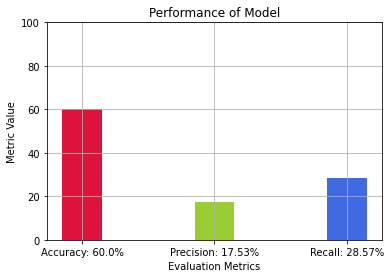

In [32]:
metric = [acc_adab, precision_adab, recall_adab]
lables=['Accuracy: '+str(round(acc_adab,2))+'%', 'Precision: '+str(round(precision_adab,2))+'%', 'Recall: '+str(round(recall_adab,2))+'%']
xpos = np.arange(len(lables))
plt.bar(xpos, metric,width = .3, color=['crimson', 'yellowgreen', 'royalblue'])
plt.xticks(xpos, lables)
x1,x2,y1,y2 = plt.axis()  
plt.axis((x1,x2,y1,100))
plt.grid()
plt.xlabel('Evaluation Metrics')
plt.ylabel('Metric Value')
plt.title("Performance of Model")
plt.savefig('g1_adab.png')
plt.show()

##Gradient Boosting

###Fitting the data

In [33]:
clf_gb = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=0).fit(X_train_scaled, y_train.ravel())
Y_pred_gb= clf_gb.predict(X_test_scaled)
acc_gb = accuracy_score(y_test, Y_pred_gb) * 100
print("Test output: \n",y_test.ravel())
print("Predicted output: \n",Y_pred_gb)

Test output: 
 [8. 8. 1. 8. 8. 0. 4. 8. 0. 4. 0. 8. 1. 8. 6. 3. 1. 1. 0. 8.]
Predicted output: 
 [8. 4. 1. 8. 4. 2. 8. 8. 2. 8. 2. 4. 1. 4. 5. 8. 1. 1. 2. 4.]


In [34]:
#Calculating the train accuracy
clf_gb = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=0).fit(X_train_scaled, y_train.ravel())
Y_pred_gbT= clf_gb.predict(X_train_scaled)
acc_gbT = accuracy_score(y_train, Y_pred_gbT) * 100

###Evaluation Results

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


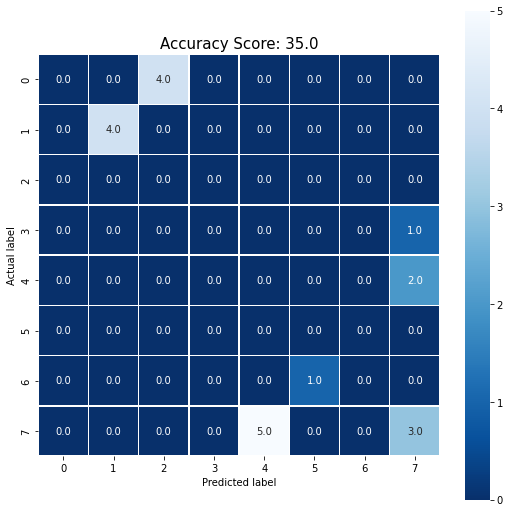

In [35]:
cnf_mt = metrics.confusion_matrix(y_test, Y_pred_gb)
plt.figure(figsize=(9,9))
sns.heatmap(cnf_mt, annot=True, fmt=".1f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(acc_gb)
plt.title(all_sample_title, size = 15);
precision_gb = metrics.precision_score(y_test, Y_pred_gb, average='macro')*100
recall_gb = metrics.recall_score(y_test, Y_pred_gb, average='macro')*100
plt.savefig('cm1_gb.png')

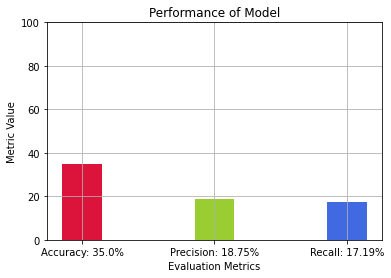

In [36]:
metric = [acc_gb, precision_gb, recall_gb]
lables=['Accuracy: '+str(round(acc_gb,2))+'%', 'Precision: '+str(round(precision_gb,2))+'%', 'Recall: '+str(round(recall_gb,2))+'%']
xpos = np.arange(len(lables))
plt.bar(xpos, metric,width = .3, color=['crimson', 'yellowgreen', 'royalblue'])
plt.xticks(xpos, lables)
x1,x2,y1,y2 = plt.axis()  
plt.axis((x1,x2,y1,100))
plt.grid()
plt.xlabel('Evaluation Metrics')
plt.ylabel('Metric Value')
plt.title("Performance of Model")
plt.savefig('g1_gb.png')
plt.show()

##Support Vector Classifier

###Fitting the data

In [37]:
clf_svc = make_pipeline(StandardScaler(), SVC(gamma='auto'))
clf_svc.fit(X_train_scaled, y_train.ravel())
Y_pred_svc = clf_svc.predict(X_test_scaled)
acc_svc = accuracy_score(y_test, Y_pred_svc) * 100
print("Test output: \n",y_test.ravel())
print("Predicted output: \n",Y_pred_svc)

Test output: 
 [8. 8. 1. 8. 8. 0. 4. 8. 0. 4. 0. 8. 1. 8. 6. 3. 1. 1. 0. 8.]
Predicted output: 
 [8. 8. 1. 8. 8. 1. 8. 8. 1. 8. 1. 8. 1. 8. 5. 8. 1. 1. 1. 8.]


In [38]:
#Calculating the train accuracy
clf_svc = make_pipeline(StandardScaler(), SVC(gamma='auto'))
clf_svc.fit(X_train_scaled, y_train.ravel())
Y_pred_svcT= clf_svc.predict(X_train_scaled)
acc_svcT = accuracy_score(y_train, Y_pred_svcT) * 100

###Evaluation Results

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


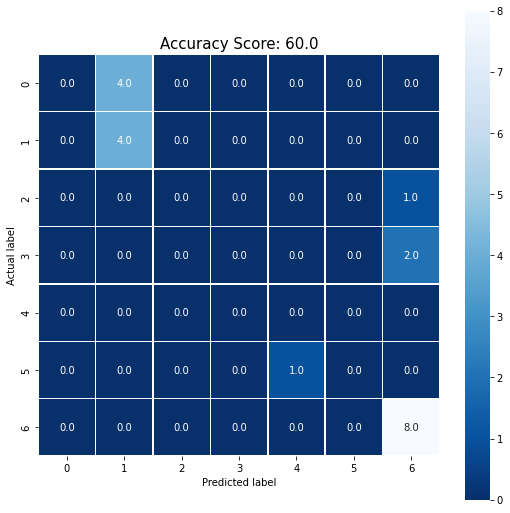

In [39]:
cnf_mt = metrics.confusion_matrix(y_test, Y_pred_svc)
plt.figure(figsize=(9,9))
sns.heatmap(cnf_mt, annot=True, fmt=".1f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(acc_svc)
plt.title(all_sample_title, size = 15);
precision_svc = metrics.precision_score(y_test, Y_pred_svc, average='macro')*100
recall_svc = metrics.recall_score(y_test, Y_pred_svc, average='macro')*100
plt.savefig('cm1_svc.png')

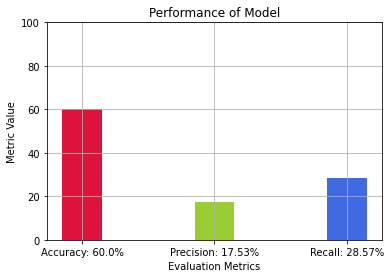

In [40]:
metric = [acc_svc, precision_svc, recall_svc]
lables=['Accuracy: '+str(round(acc_svc,2))+'%', 'Precision: '+str(round(precision_svc,2))+'%', 'Recall: '+str(round(recall_svc,2))+'%']
xpos = np.arange(len(lables))
plt.bar(xpos, metric,width = .3, color=['crimson', 'yellowgreen', 'royalblue'])
plt.xticks(xpos, lables)
x1,x2,y1,y2 = plt.axis()  
plt.axis((x1,x2,y1,100))
plt.grid()
plt.xlabel('Evaluation Metrics')
plt.ylabel('Metric Value')
plt.title("Performance of Model")
plt.savefig('g1_svc.png')
plt.show()

##Gaussian Naive Bayes

###Fitting the data

In [41]:
clf_gnb = GaussianNB()
clf_gnb.fit(X_train_scaled, y_train.ravel())
Y_pred_gnb = clf_gnb.predict(X_test_scaled)
acc_gnb = accuracy_score(y_test, Y_pred_gnb) * 100
print("Test output: \n",y_test.ravel())
print("Predicted output: \n",Y_pred_gnb)

Test output: 
 [8. 8. 1. 8. 8. 0. 4. 8. 0. 4. 0. 8. 1. 8. 6. 3. 1. 1. 0. 8.]
Predicted output: 
 [8. 8. 1. 8. 8. 0. 4. 8. 0. 4. 0. 8. 1. 8. 6. 8. 1. 1. 0. 8.]


In [42]:
#Calculating the train accuracy
clf_gnb = GaussianNB()
clf_gnb.fit(X_train_scaled, y_train.ravel())
Y_pred_gnbT= clf_gnb.predict(X_train_scaled)
acc_gnbT = accuracy_score(y_train, Y_pred_gnbT) * 100

###Evaluation Results

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


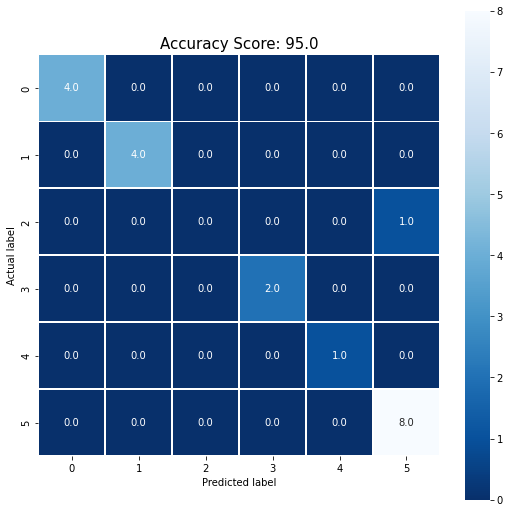

In [43]:
cnf_mt = metrics.confusion_matrix(y_test, Y_pred_gnb)
plt.figure(figsize=(9,9))
sns.heatmap(cnf_mt, annot=True, fmt=".1f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(acc_gnb)
plt.title(all_sample_title, size = 15);
precision_gnb = metrics.precision_score(y_test, Y_pred_gnb, average='macro')*100
recall_gnb = metrics.recall_score(y_test, Y_pred_gnb, average='macro')*100
plt.savefig('cm1_gnb.png')

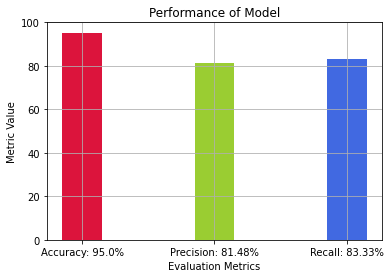

In [44]:
metric = [acc_gnb, precision_gnb, recall_gnb]
lables=['Accuracy: '+str(round(acc_gnb,2))+'%', 'Precision: '+str(round(precision_gnb,2))+'%', 'Recall: '+str(round(recall_gnb,2))+'%']
xpos = np.arange(len(lables))
plt.bar(xpos, metric,width = .3, color=['crimson', 'yellowgreen', 'royalblue'])
plt.xticks(xpos, lables)
x1,x2,y1,y2 = plt.axis()  
plt.axis((x1,x2,y1,100))
plt.grid()
plt.xlabel('Evaluation Metrics')
plt.ylabel('Metric Value')
plt.title("Performance of Model")
plt.savefig('g1_gnb.png')
plt.show()

##Multinomial Naive Bayes

###Fitting the data

In [45]:
clf_mnb = MultinomialNB()
clf_mnb.fit(X_train, y_train.ravel())
Y_pred_mnb = clf_mnb.predict(X_test)
acc_mnb = accuracy_score(y_test, Y_pred_mnb) * 100
print("Test output: \n",y_test.ravel())
print("Predicted output: \n",Y_pred_mnb)

Test output: 
 [8. 8. 1. 8. 8. 0. 4. 8. 0. 4. 0. 8. 1. 8. 6. 3. 1. 1. 0. 8.]
Predicted output: 
 [4. 8. 1. 4. 8. 1. 4. 4. 1. 4. 1. 8. 1. 8. 5. 4. 1. 1. 1. 8.]


In [46]:
#Calculating the train accuracy
clf_mnb = MultinomialNB()
clf_mnb.fit(X_train, y_train.ravel())
Y_pred_mnbT= clf_mnb.predict(X_train)
acc_mnbT = accuracy_score(y_train, Y_pred_mnbT) * 100

###Evaluation Results

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


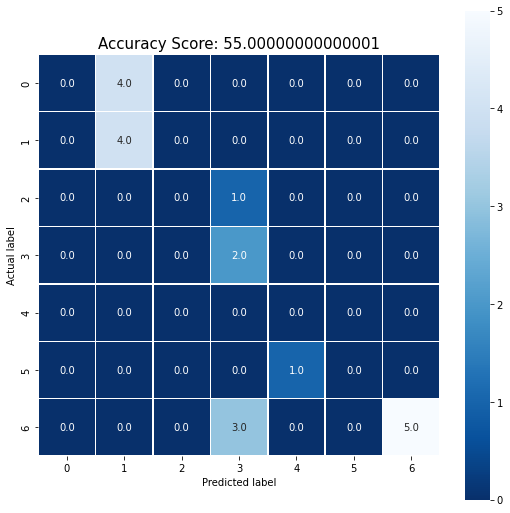

In [47]:
cnf_mt = metrics.confusion_matrix(y_test, Y_pred_mnb)
plt.figure(figsize=(9,9))
sns.heatmap(cnf_mt, annot=True, fmt=".1f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(acc_mnb)
plt.title(all_sample_title, size = 15);
precision_mnb = metrics.precision_score(y_test, Y_pred_mnb, average='macro')*100
recall_mnb = metrics.recall_score(y_test, Y_pred_mnb, average='macro')*100
plt.savefig('cm1_mnb.png')

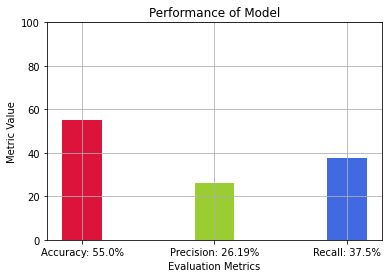

In [48]:
metric = [acc_mnb, precision_mnb, recall_mnb]
lables=['Accuracy: '+str(round(acc_mnb,2))+'%', 'Precision: '+str(round(precision_mnb,2))+'%', 'Recall: '+str(round(recall_mnb,2))+'%']
xpos = np.arange(len(lables))
plt.bar(xpos, metric,width = .3, color=['crimson', 'yellowgreen', 'royalblue'])
plt.xticks(xpos, lables)
x1,x2,y1,y2 = plt.axis()  
plt.axis((x1,x2,y1,100))
plt.grid()
plt.xlabel('Evaluation Metrics')
plt.ylabel('Metric Value')
plt.title("Performance of Model")
plt.savefig('g1_mnb.png')
plt.show()

#Accuracy Results

In [49]:
print("Results")
print(" ")
print("Logistic Regression: ")
print("Test Accuracy: ", round(acc_log,2), "Train Accuracy: ", acc_logT)
print(" ")
print("Random Forrest: ")
print("Test Accuracy: ", round(acc_rf ,2), "Train Accuracy: ", acc_rfT)
print(" ")
print("Decision Tree: ")
print("Test Accuracy: ", round(acc_dt,2), "Train Accuracy: ", acc_dtT)
print(" ")
print("K-nearest neighbour: ")
print("Test Accuracy: ", round(acc_knn,2), "Train Accuracy: ", acc_knnT)
print(" ")
print("MLP: ")
print("Test Accuracy: ", round(acc_mlp,2), "Train Accuracy: ", acc_mlpT)
print(" ")
print("Adaboost: ")
print("Test Accuracy: ", round(acc_adab,2), "Train Accuracy: ", acc_adabT)
print(" ")
print("Gradient Boosting: ")
print("Test Accuracy: ", round(acc_gb,2), "Train Accuracy: ", acc_gbT)
print(" ")
print("SVC: ")
print("Test Accuracy: ", round(acc_svc,2), "Train Accuracy: ", acc_svcT)
print(" ")
print("Gaussian Naive Bayes: ")
print("Test Accuracy: ", round(acc_gnb,2), "Train Accuracy: ", acc_gnbT)
print(" ")
print("Multinomial Naive Bayes: ")
print("Test Accuracy: ", round(acc_mnb,2), "Train Accuracy: ", acc_mnbT)

Results
 
Logistic Regression: 
Test Accuracy:  60.0 Train Accuracy:  73.75
 
Random Forrest: 
Test Accuracy:  80.0 Train Accuracy:  100.0
 
Decision Tree: 
Test Accuracy:  80.0 Train Accuracy:  100.0
 
K-nearest neighbour: 
Test Accuracy:  75.0 Train Accuracy:  86.25
 
MLP: 
Test Accuracy:  60.0 Train Accuracy:  77.5
 
Adaboost: 
Test Accuracy:  60.0 Train Accuracy:  73.75
 
Gradient Boosting: 
Test Accuracy:  35.0 Train Accuracy:  22.5
 
SVC: 
Test Accuracy:  60.0 Train Accuracy:  73.75
 
Gaussian Naive Bayes: 
Test Accuracy:  95.0 Train Accuracy:  97.5
 
Multinomial Naive Bayes: 
Test Accuracy:  55.0 Train Accuracy:  73.75


#References

[1] F. Pedregosa κ.ά., ‘Scikit-learn: Machine Learning in Python’, Journal of Machine Learning Research, τ. 12, σσ. 2825–2830, 2011.